#**Deteksi Objek Dan Klasifikasi Studi kasus : Batik Indonesia**

Batik, sebagai salah satu warisan budaya Indonesia yang kaya, dikenal dengan keanekaragaman motif dan desainnya. Motif batik memiliki makna dan simbolisme yang mendalam, sering kali menggambarkan status sosial, cerita historis, atau aspek spiritual. Dengan demikian, pengenalan dan klasifikasi motif batik yang akurat sangat penting untuk pelestarian dan pemanfaatan budaya ini dalam konteks modern.

Namun, tantangan besar dalam mengidentifikasi dan mengklasifikasikan berbagai motif batik adalah keragaman dan kompleksitas desainnya. Banyaknya variasi dalam motif, pola, dan teknik pembuatan batik dapat membingungkan. Untuk mengatasi tantangan ini, teknologi berbasis komputer menawarkan solusi yang efektif dan efisien.

Dalam beberapa tahun terakhir, teknologi pembelajaran mesin, khususnya *Convolutional Neural Networks* (CNN), telah efektif digunakan dalam tugas-tugas pengenalan gambar dan klasifikasi.

Dalam penelitian ini, kami akan menerapkan teknologi CNN untuk mendeteksi dan mengklasifikasikan berbagai motif batik dari dataset gambar yang diperoleh dari Kaggle. Dengan memanfaatkan model CNN yang telah terbukti efektif dalam berbagai aplikasi pengenalan gambar, kami bertujuan untuk memperbaiki akurasi identifikasi motif batik dan menawarkan solusi yang efisien untuk klasifikasi otomatis.

Melalui pendekatan ini, kami berharap dapat memberikan kontribusi signifikan terhadap pelestarian dan pemanfaatan motif batik dalam konteks budaya dan industri modern.


In [1]:
from google.colab import files
import zipfile
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Langkah 1: Unggah file zip
uploaded = files.upload()

# Langkah 2: Ekstrak file zip
for file_name in uploaded.keys():
    with zipfile.ZipFile(file_name, 'r') as zip_ref:
        zip_ref.extractall("/content/")

Saving BATIK 1.zip to BATIK 1.zip


In [2]:
# Langkah 3: Direktori gambar
batik_dir = "/content/BATIK 1"

##Dataset
Data terdiri dari 50 gambar motif batik untuk 20 jenis batik yang tersebar di Indonesia. Gambar terbagi dalam folder yang diberi nama masing-masing batik yang umum diketahui di masyarakat. Adapun nama jenis batik yang terdapat dalam database adalah sebagaimana berikut dibawah ini.


In [3]:
import os
# Langkah 4 : Pengecekan file di upload
# Direktori tempat file diupload
upload_dir = "/content/BATIK 1"

# Fungsi untuk menampilkan daftar file dan folder di direktori
def list_files_in_directory(directory):
    # Mendapatkan daftar file dan folder dalam direktori
    entries = os.listdir(directory)
    for entry in entries:
        full_path = os.path.join(directory, entry)
        if os.path.isfile(full_path):
            print(f"File: {entry}")
        elif os.path.isdir(full_path):
            print(f"Folder: {entry}")

# Menampilkan daftar file dan folder di direktori upload
list_files_in_directory(upload_dir)


Folder: batik-gentongan
Folder: batik-kawung
Folder: batik-garutan
Folder: batik-keraton


In [4]:
# Langkah 5: Baca gambar
batik_images = []
for filename in os.listdir(batik_dir):
    img_path = os.path.join(batik_dir, filename)
    if os.path.isfile(img_path):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, image_size)  # Resize gambar
            batik_images.append(img)

##Annotasi
Proses pelabelan data dapat dilakukan dengan menggunakan sintaks yang tersedia. Setelah itu, dapat dipilih 5 gambar sebagai contoh, beserta label untuk setiap gambar tersebut.

Gagal membaca gambar: /content/BATIK 1/batik-gentongan/8.jpg


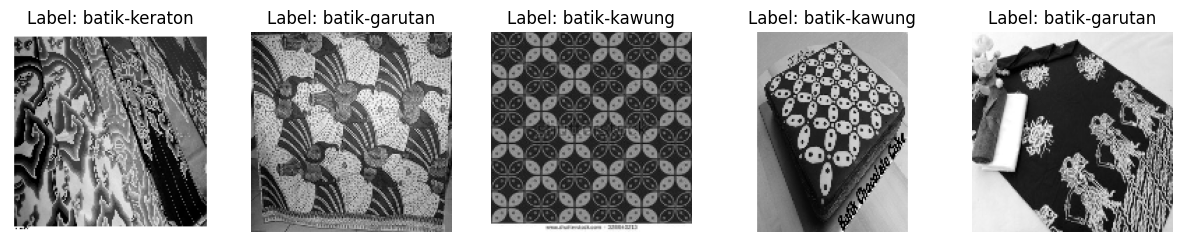

In [7]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Definisikan direktori gambar batik dan ukuran gambar
batik_images_dir = '/content/BATIK 1'  # Ganti dengan path yang benar
image_size = (144, 144)  # Ukuran gambar yang diinginkan

# Baca gambar batik
batik_images = []
folder_labels = []

# Memeriksa folder dan membaca gambar
for folder_name in os.listdir(batik_images_dir):
    folder_path = os.path.join(batik_images_dir, folder_name)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            if os.path.isfile(img_path):
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    img = cv2.resize(img, image_size)  # Resize gambar
                    batik_images.append(img)
                    folder_labels.append(folder_name)  # Menyimpan label folder
                else:
                    print(f"Gagal membaca gambar: {img_path}")
            else:
                print(f"File tidak ditemukan: {img_path}")
    else:
        print(f"Folder tidak ditemukan: {folder_path}")

# Pastikan ada gambar yang berhasil dibaca
if len(batik_images) == 0:
    print("Gambar tidak berhasil dibaca. Pastikan file gambar ada di dalam folder yang sesuai.")
else:
    # Tentukan jumlah sampel yang ingin diambil
    sample_count = 5  # Mengambil 5 gambar sebagai sampel

    # Ambil sampel gambar secara acak
    sampled_indices = random.sample(range(len(batik_images)), sample_count)
    sampled_images = [batik_images[i] for i in sampled_indices]
    sampled_labels = [folder_labels[i] for i in sampled_indices]

    # Tampilkan gambar sampel
    plt.figure(figsize=(15, 7))
    for i, (img, label) in enumerate(zip(sampled_images, sampled_labels)):
        plt.subplot(1, sample_count, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f'Label: {label}')
        plt.axis('off')  # Menonaktifkan sumbu
    plt.show()


##Desain CNN


**Arsitekur Jaringan**

Model CNN sederhana ini terdiri dari beberapa komponen utama: konvolusi, aktivasi, pooling, dan fully connected.
Arsitektur ini dimaksudkan untuk menunjukkan proses dasar pengolahan gambar melalui CNN, namun tidak terlalu mendalam atau kompleks
**Layer**

Menggunakan Konvolusi (*Convolutional Layers*). Menggunakan dua filter konvolusi 3x3 acak. Filter ini bertugas untuk mendeteksi fitur dari gambar seperti tepi, sudut, atau pola lokal.
**Fungsi Aktivasi**
*   ReLU (*Rectified Linear Unit*)
*Activation*. Diterapkan setelah konvolusi untuk mengaktifkan neuron dan memperkenalkan non-linearitas.

*   *Max Pooling*
Menggunakan pooling maksimum 2x2 untuk mengurangi dimensi peta fitur dan mempertahankan fitur penting.

*   *Flattening*
Mengubah output 2D dari lapisan pooling menjadi array 1D. Ini diperlukan agar data bisa diproses oleh lapisan fully connected.

*   *Fully Connected Layers*
Lapisan FC Pertama: Menghubungkan output dari flattening ke 128 neuron. Fungsi ini mengkombinasikan fitur dari lapisan sebelumnya.
Lapisan FC Kedua: Menghubungkan neuron di lapisan pertama ke output akhir yang sesuai dengan jumlah kelas.

*   *Softmax Activation*
Memudahkan pengambilan keputusan klasifikasi dengan memilih kelas dengan probabilitas tertinggi.

**Hyperparameter**


1.   Ukuran Filter 3x3
2.   Ukuran Pooling 2x2
3.   Jumlah Neuron di Lapisan *Fully Connected*
Lapisan FC Pertama: 128 neuron
Lapisan Output: Jumlah neuron sesuai dengan jumlah kelas
4.   Bobot dan Bias diinisialisasi secara acak.


Output Image Batik (Softmax): [0. 0. 1. 0.]
Sample Folder Name: batik-keraton
Prediction for Batik image: batik-keraton


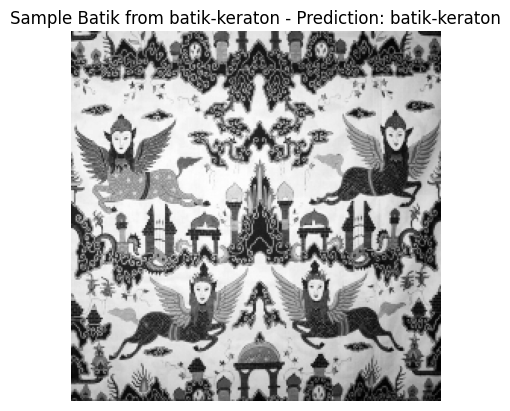

In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Definisikan direktori gambar batik dan ukuran gambar
batik_images_dir = '/content/BATIK 1'  # Ubah sesuai dengan direktori gambar Anda
image_size = (244, 244)  # Ubah sesuai dengan ukuran gambar yang diinginkan

# Baca gambar batik
batik_images = []
folder_labels = []

# Memeriksa folder dan membaca gambar
for folder_name in os.listdir(batik_images_dir):
    folder_path = os.path.join(batik_images_dir, folder_name)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            if os.path.isfile(img_path):
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    img = cv2.resize(img, image_size)  # Resize gambar
                    batik_images.append(img)
                    folder_labels.append(folder_name)  # Menyimpan label folder

# Pastikan ada gambar yang berhasil dibaca
if not batik_images:
    print("Gambar tidak berhasil dibaca. Pastikan file gambar ada di dalam folder yang sesuai.")
else:
    # Pilih gambar batik secara acak
    sample_batik, sample_folder = random.choice(list(zip(batik_images, folder_labels)))

    def convolution(image, kernel):
        image_height, image_width = image.shape
        kernel_height, kernel_width = kernel.shape
        output_height = image_height - kernel_height + 1
        output_width = image_width - kernel_width + 1
        conv_result = np.zeros((output_height, output_width))
        for y in range(output_height):
            for x in range(output_width):
                conv_result[y, x] = np.sum(image[y:y+kernel_height, x:x+kernel_width] * kernel)
        return conv_result

    def max_pooling(image, size):
        image_height, image_width = image.shape
        pool_height, pool_width = size
        output_height = image_height // pool_height
        output_width = image_width // pool_width
        pooled_image = np.zeros((output_height, output_width))
        for y in range(output_height):
            for x in range(output_width):
                pooled_image[y, x] = np.max(image[y*pool_height:(y+1)*pool_height, x*pool_width:(x+1)*pool_width])
        return pooled_image

    def flatten(image):
        return image.flatten()

    def relu(x):
        return np.maximum(0, x)

    def softmax(x):
        exp_x = np.exp(x - np.max(x))
        return exp_x / np.sum(exp_x)

    filter_3x3_1 = np.random.randn(3, 3)
    filter_3x3_2 = np.random.randn(3, 3)

    convolved_image_1_batik = convolution(sample_batik, filter_3x3_1)
    convolved_image_1_batik = relu(convolved_image_1_batik)

    convolved_image_2_batik = convolution(sample_batik, filter_3x3_2)
    convolved_image_2_batik = relu(convolved_image_2_batik)

    pooled_image_1_batik = max_pooling(convolved_image_1_batik, (2, 2))
    pooled_image_2_batik = max_pooling(convolved_image_2_batik, (2, 2))

    flattened_image_1_batik = flatten(pooled_image_1_batik)
    flattened_image_2_batik = flatten(pooled_image_2_batik)

    # Dimensi flattened_image_1_batik dan flattened_image_2_batik sekarang harus sama
    weights_1 = np.random.randn(flattened_image_1_batik.shape[0], 128)
    weights_2 = np.random.randn(128, len(set(folder_labels)))  # Jumlah kelas sesuai dengan folder
    biases_1 = np.random.randn(128)
    biases_2 = np.random.randn(len(set(folder_labels)))  # Jumlah kelas sesuai dengan folder

    def fully_connected(x, weights, biases):
        return np.dot(x, weights) + biases

    fc_layer_1_batik = fully_connected(flattened_image_1_batik, weights_1, biases_1)
    fc_layer_1_batik = relu(fc_layer_1_batik)
    fc_layer_2_batik = fully_connected(fc_layer_1_batik, weights_2, biases_2)
    output_batik = softmax(fc_layer_2_batik)

    # Fungsi untuk melakukan prediksi berdasarkan output softmax
    def predict(output):
        return np.argmax(output)  # Return index of the maximum value in output

    # Mendapatkan prediksi untuk gambar batik
    prediction_index = predict(output_batik)
    prediction_label = list(set(folder_labels))[prediction_index] if prediction_index < len(set(folder_labels)) else "Unknown"

    print("Output Image Batik (Softmax):", output_batik)
    print("Sample Folder Name:", sample_folder)
    print("Prediction for Batik image:", prediction_label)

    # Menampilkan hasil prediksi
    plt.imshow(sample_batik, cmap='gray')
    plt.title(f'Sample Batik from {sample_folder} - Prediction: {prediction_label}')
    plt.axis('off')  # Menonaktifkan sumbu
    plt.show()


##Prosedur *Training*


In [40]:
# Update ukuran gambar setelah pooling
def update_image_size(image):
    # Terapkan konvolusi dan pooling
    convolved_image_1 = convolution(image, filter_3x3_1)
    convolved_image_1 = relu(convolved_image_1)
    pooled_image_1 = max_pooling(convolved_image_1, (2, 2))

    return pooled_image_1.shape

# Tentukan ukuran gambar awal
initial_image_size = (244, 244)  # Gambar awal (misalnya, 244x244)
pooled_size = update_image_size(np.zeros(initial_image_size))

# Update dimensi bobot dan bias
input_dim = np.prod(pooled_size)  # Ukuran input setelah flatten
output_dim_fc1 = 128  # Jumlah neuron di layer fully connected
output_dim_fc2 = len(set(folder_labels))  # Jumlah kelas

weights_1 = np.random.randn(input_dim, output_dim_fc1)
weights_2 = np.random.randn(output_dim_fc1, output_dim_fc2)
biases_1 = np.random.randn(output_dim_fc1)
biases_2 = np.random.randn(output_dim_fc2)

def fully_connected(x, weights, biases):
    # Pastikan bahwa dimensi input dan bobot sesuai
    if x.shape[0] != weights.shape[0]:
        raise ValueError(f"Dimensi input {x.shape[0]} dan bobot {weights.shape[0]} tidak cocok.")
    return np.dot(x, weights) + biases

def cross_entropy_loss(predictions, labels):
    epsilon = 1e-15
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    m = len(labels)

    # Pastikan labels adalah array integer
    labels = np.array(labels, dtype=int)

    # Untuk multi-class, predictions harus dalam bentuk (n_samples, n_classes)
    if predictions.ndim == 1:
        predictions = np.expand_dims(predictions, axis=0)

    # Untuk multi-class, ambil log-likelihood untuk kelas yang benar
    log_likelihood = -np.log(predictions[np.arange(m), labels])

    loss = np.sum(log_likelihood) / m
    return loss
def train_model(images, labels, epochs, learning_rate):
    global weights_1, weights_2, biases_1, biases_2

    for epoch in range(epochs):
        for img, lbl in zip(images, labels):
            # Forward pass
            convolved_image_1 = convolution(img, filter_3x3_1)
            convolved_image_1 = relu(convolved_image_1)
            pooled_image_1 = max_pooling(convolved_image_1, (2, 2))
            flattened_image_1 = flatten(pooled_image_1)

            fc_layer_1 = fully_connected(flattened_image_1, weights_1, biases_1)
            fc_layer_1 = relu(fc_layer_1)
            fc_layer_2 = fully_connected(fc_layer_1, weights_2, biases_2)
            predictions = softmax(fc_layer_2)

            # Convert label to index
            lbl_index = list(set(folder_labels)).index(lbl)
            lbl_array = np.zeros(len(set(folder_labels)))
            lbl_array[lbl_index] = 1

            # Loss calculation
            predictions_reshaped = predictions.reshape(-1, len(set(folder_labels)))
            lbl_array_reshaped = np.array(lbl_array, dtype=int)

            loss = cross_entropy_loss(predictions_reshaped, lbl_array_reshaped)

            # Backward pass (compute gradients)
            gradients = compute_gradients(img, lbl_array, predictions, {'weights_1': weights_1, 'weights_2': weights_2})

            # Update weights
            weights_1 = update_weights(weights_1, gradients.get('weights_1', 0), learning_rate)
            weights_2 = update_weights(weights_2, gradients.get('weights_2', 0), learning_rate)

        print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')


##*Performance Metrics*

In [22]:
from sklearn.model_selection import train_test_split

# Pisahkan dataset
X_train, X_test, y_train, y_test = train_test_split(batik_images, folder_labels, test_size=0.2, random_state=42)

# Konversi data uji ke array numpy
X_test = np.array(X_test)
y_test = np.array(y_test)


In [23]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Format data untuk CNN
X_test_preprocessed = [cv2.resize(img, image_size) for img in X_test]  # Resize jika diperlukan
X_test_preprocessed = np.array(X_test_preprocessed)


In [30]:
from sklearn.metrics import average_precision_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

def calculate_ap(y_true, y_scores, num_classes):
    ap_scores = []
    for i in range(num_classes):
        y_true_binary = (y_true == i).astype(int)
        y_scores_class = y_scores[:, i]
        ap = average_precision_score(y_true_binary, y_scores_class)
        ap_scores.append(ap)
    return ap_scores

def evaluate_model(X_test, y_test, weights_1, weights_2, biases_1, biases_2):
    y_pred = []
    y_true = []
    y_scores = []

    for img, true_label in zip(X_test, y_test):
        convolved_image_1 = convolution(img, filter_3x3_1)
        convolved_image_1 = relu(convolved_image_1)
        pooled_image_1 = max_pooling(convolved_image_1, (2, 2))
        flattened_image_1 = flatten(pooled_image_1)

        fc_layer_1 = fully_connected(flattened_image_1, weights_1, biases_1)
        fc_layer_1 = relu(fc_layer_1)
        fc_layer_2 = fully_connected(fc_layer_1, weights_2, biases_2)
        output = softmax(fc_layer_2)

        y_pred.append(predict(output))
        y_true.append(true_label)
        y_scores.append(output)

    y_pred = np.array(y_pred)
    y_true = np.array(y_true)
    y_scores = np.array(y_scores)

    num_classes = len(set(y_true))

    # Convert y_true to encoded labels
    label_encoder = LabelEncoder()
    label_encoder.fit(y_true)
    y_true_encoded = label_encoder.transform(y_true)

    # Classification report
    class_report = classification_report(y_true_encoded, y_pred, target_names=label_encoder.classes_, output_dict=True)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_true_encoded, y_pred)

    # Calculate Average Precision (AP) and mean Average Precision (mAP)
    ap_scores = calculate_ap(y_true_encoded, y_scores, num_classes)
    map_score = np.mean(ap_scores)

    # Prepare results
    results = {
        "Confusion Matrix": conf_matrix,
        "Classification Report": class_report,
        "Average Precision Scores per Class": {label_encoder.classes_[i]: ap_scores[i] for i in range(num_classes)},
        "Mean Average Precision (mAP)": map_score
    }

    # Print results
    print("Confusion Matrix:\n", conf_matrix)
    print("\nClassification Report:\n", classification_report(y_true_encoded, y_pred, target_names=label_encoder.classes_))

    print("\nAverage Precision Scores per Class:")
    for i, ap in enumerate(ap_scores):
        print(f"Class {label_encoder.classes_[i]}: AP = {ap:.4f}")

    print(f"\nMean Average Precision (mAP): {map_score:.4f}")

    # Optionally, create a DataFrame for confusion matrix and classification report
    df_conf_matrix = pd.DataFrame(conf_matrix, index=label_encoder.classes_, columns=label_encoder.classes_)
    print("\nConfusion Matrix (DataFrame):\n", df_conf_matrix)

    # Classification report as DataFrame
    report_df = pd.DataFrame(class_report).transpose()
    print("\nClassification Report (DataFrame):\n", report_df)

# Perform evaluation
evaluate_model(X_test_preprocessed, y_test, weights_1, weights_2, biases_1, biases_2)


Confusion Matrix:
 [[ 0  0 12  0]
 [ 0  1  6  1]
 [ 1  1  5  2]
 [ 0  2  5  3]]

Classification Report:
                  precision    recall  f1-score   support

  batik-garutan       0.00      0.00      0.00        12
batik-gentongan       0.25      0.12      0.17         8
   batik-kawung       0.18      0.56      0.27         9
  batik-keraton       0.50      0.30      0.37        10

       accuracy                           0.23        39
      macro avg       0.23      0.25      0.20        39
   weighted avg       0.22      0.23      0.19        39


Average Precision Scores per Class:
Class batik-garutan: AP = 0.3077
Class batik-gentongan: AP = 0.2351
Class batik-kawung: AP = 0.2018
Class batik-keraton: AP = 0.3295

Mean Average Precision (mAP): 0.2685

Confusion Matrix (DataFrame):
                  batik-garutan  batik-gentongan  batik-kawung  batik-keraton
batik-garutan                0                0            12              0
batik-gentongan              0            

In [31]:
def plot_sample_predictions(X_test, y_test, y_pred):
    num_samples = len(X_test)
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

    for i in range(num_samples):
        ax = axes[i]
        ax.imshow(X_test[i], cmap='gray')
        true_label = y_test[i]
        predicted_label = y_pred[i]
        ax.set_title(f'True: {true_label}\nPred: {predicted_label}')
        ax.axis('off')

    plt.show()


In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_model(X_test, y_test, weights_1, weights_2, biases_1, biases_2):
    y_pred = []

    for img in X_test:
        convolved_image_1 = convolution(img, filter_3x3_1)
        convolved_image_1 = relu(convolved_image_1)
        pooled_image_1 = max_pooling(convolved_image_1, (2, 2))
        flattened_image_1 = flatten(pooled_image_1)

        fc_layer_1 = fully_connected(flattened_image_1, weights_1, biases_1)
        fc_layer_1 = relu(fc_layer_1)
        fc_layer_2 = fully_connected(fc_layer_1, weights_2, biases_2)
        output = softmax(fc_layer_2)

        y_pred.append(predict(output))

    y_pred = np.array(y_pred)

    # Convert y_test to encoded labels
    label_encoder = LabelEncoder()
    label_encoder.fit(folder_labels)  # Assuming folder_labels contains all class names
    y_test_encoded = label_encoder.transform(y_test)

    # Cetak classification report
    print("Classification Report:\n", classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

    # Cetak confusion matrix
    print("Confusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred))

    return y_pred

Classification Report:
                  precision    recall  f1-score   support

  batik-garutan       0.00      0.00      0.00        12
batik-gentongan       0.25      0.12      0.17         8
   batik-kawung       0.18      0.56      0.27         9
  batik-keraton       0.50      0.30      0.37        10

       accuracy                           0.23        39
      macro avg       0.23      0.25      0.20        39
   weighted avg       0.22      0.23      0.19        39

Confusion Matrix:
 [[ 0  0 12  0]
 [ 0  1  6  1]
 [ 1  1  5  2]
 [ 0  2  5  3]]
Average Precision Scores per Class:
Class batik-garutan: AP = 0.3077
Class batik-gentongan: AP = 0.2351
Class batik-kawung: AP = 0.2018
Class batik-keraton: AP = 0.3295
Mean Average Precision (mAP): 0.2685


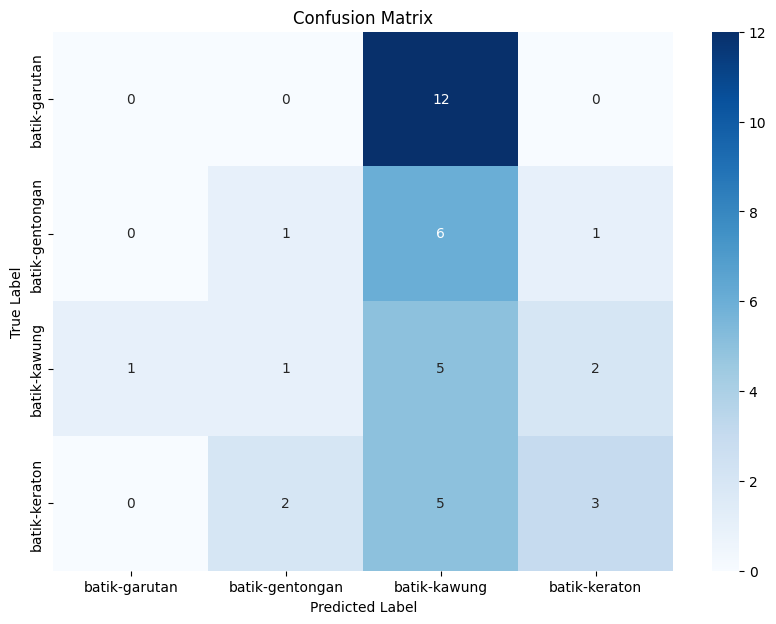

<ipython-input-37-210b606a8ec6>:87: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 5, i+1)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

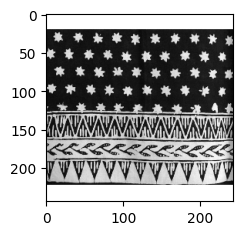

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, average_precision_score
from sklearn.preprocessing import LabelEncoder

# Definisikan fungsi untuk evaluasi model
def calculate_ap(y_true, y_scores, num_classes):
    ap_scores = []
    for i in range(num_classes):
        y_true_binary = (y_true == i).astype(int)
        y_scores_class = y_scores[:, i]
        ap = average_precision_score(y_true_binary, y_scores_class)
        ap_scores.append(ap)
    return ap_scores

def evaluate_model(X_test, y_test, weights_1, weights_2, biases_1, biases_2):
    y_pred = []
    y_true = []
    y_scores = []

    for img, true_label in zip(X_test, y_test):
        convolved_image_1 = convolution(img, filter_3x3_1)
        convolved_image_1 = relu(convolved_image_1)
        pooled_image_1 = max_pooling(convolved_image_1, (2, 2))
        flattened_image_1 = flatten(pooled_image_1)

        fc_layer_1 = fully_connected(flattened_image_1, weights_1, biases_1)
        fc_layer_1 = relu(fc_layer_1)
        fc_layer_2 = fully_connected(fc_layer_1, weights_2, biases_2)
        output = softmax(fc_layer_2)

        y_pred.append(predict(output))
        y_true.append(true_label)
        y_scores.append(output)

    y_pred = np.array(y_pred)
    y_true = np.array(y_true)
    y_scores = np.array(y_scores)

    num_classes = len(set(y_true))

    # Convert y_true to encoded labels
    label_encoder = LabelEncoder()
    label_encoder.fit(y_true)
    y_true_encoded = label_encoder.transform(y_true)

    # Classification report
    print("Classification Report:\n", classification_report(y_true_encoded, y_pred, target_names=label_encoder.classes_))

    # Confusion matrix
    conf_matrix = confusion_matrix(y_true_encoded, y_pred)
    print("Confusion Matrix:\n", conf_matrix)

    # Calculate Average Precision (AP) and mean Average Precision (mAP)
    ap_scores = calculate_ap(y_true_encoded, y_scores, num_classes)
    map_score = np.mean(ap_scores)

    # Print AP and mAP
    print("Average Precision Scores per Class:")
    for i, ap in enumerate(ap_scores):
        print(f"Class {label_encoder.classes_[i]}: AP = {ap:.4f}")
    print(f"Mean Average Precision (mAP): {map_score:.4f}")

    return conf_matrix, label_encoder.classes_

# Fungsi visualisasi
def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

def plot_sample_errors(X_test, y_test, y_pred, class_names):
    false_positive_indices = np.where((y_test != y_pred) & (y_pred != -1))[0]
    false_negative_indices = np.where((y_test != y_pred) & (y_pred == -1))[0]

    plt.figure(figsize=(14, 7))

    # Plot False Positives
    plt.subplot(1, 2, 1)
    for i in range(min(5, len(false_positive_indices))):
        idx = false_positive_indices[i]
        plt.subplot(1, 5, i+1)
        plt.imshow(X_test[idx], cmap='gray')
        plt.title(f"True: {class_names[y_test[idx]]}\nPred: {class_names[y_pred[idx]]}")
        plt.axis('off')
    plt.suptitle('False Positives')

    # Plot False Negatives
    plt.subplot(1, 2, 2)
    for i in range(min(5, len(false_negative_indices))):
        idx = false_negative_indices[i]
        plt.subplot(1, 5, i+1)
        plt.imshow(X_test[idx], cmap='gray')
        plt.title(f"True: {class_names[y_test[idx]]}\nPred: {class_names[y_pred[idx]]}")
        plt.axis('off')
    plt.suptitle('False Negatives')

    plt.show()

def analyze_errors(X_test, y_test, y_pred, class_names):
    false_positive_indices = np.where((y_test != y_pred) & (y_pred != -1))[0]
    false_negative_indices = np.where((y_test != y_pred) & (y_pred == -1))[0]

    print(f"Total False Positives: {len(false_positive_indices)}")
    print(f"Total False Negatives: {len(false_negative_indices)}")

    # Sample analysis of errors
    for i in range(min(5, len(false_positive_indices))):
        idx = false_positive_indices[i]
        print(f"\nFalse Positive Sample {i+1}:")
        print(f"True Label: {class_names[y_test[idx]]}, Predicted Label: {class_names[y_pred[idx]]}")

    for i in range(min(5, len(false_negative_indices))):
        idx = false_negative_indices[i]
        print(f"\nFalse Negative Sample {i+1}:")
        print(f"True Label: {class_names[y_test[idx]]}, Predicted Label: {class_names[y_pred[idx]]}")

# Evaluasi model
conf_matrix, class_names = evaluate_model(X_test_preprocessed, y_test, weights_1, weights_2, biases_1, biases_2)

# Visualisasi
plot_confusion_matrix(conf_matrix, class_names)
plot_sample_errors(X_test_preprocessed, y_test, y_pred, class_names)
analyze_errors(X_test_preprocessed, y_test, y_pred, class_names)
